In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.style.use('fivethirtyeight')


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load Data
train = pd.read_csv('ggstore_train.csv',encoding = 'unicode_escape')
test = pd.read_csv('ggstore_test.csv',encoding = 'unicode_escape')
test_id = test.id

In [3]:
train.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,2018-01-07,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,1
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,2018-08-01,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,2018-06-08,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,4


# 1. EDA & Data Processing

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
 11  Id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1404 non-null   object 
 1   Category        1404 non-null   object 
 2   Reviews         1404 non-null   int64  
 3   Size            1404 non-null   float64
 4   Installs        1404 non-null   float64
 5   Type            1404 non-null   int64  
 6   Price           1404 non-null   float64
 7   Content Rating  1404 non-null   object 
 8   Genres          1404 non-null   object 
 9   Last Updated    1404 non-null   object 
 10  Id              1404 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 120.8+ KB


In [6]:
train.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Id                0
dtype: int64

In [7]:
test.isna().sum()

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Id                0
dtype: int64

In [8]:
type(train.loc[0, 'Category'])

str

- 데이터의 결측치는 발견되지 않았다.

#### 연속형 변수 

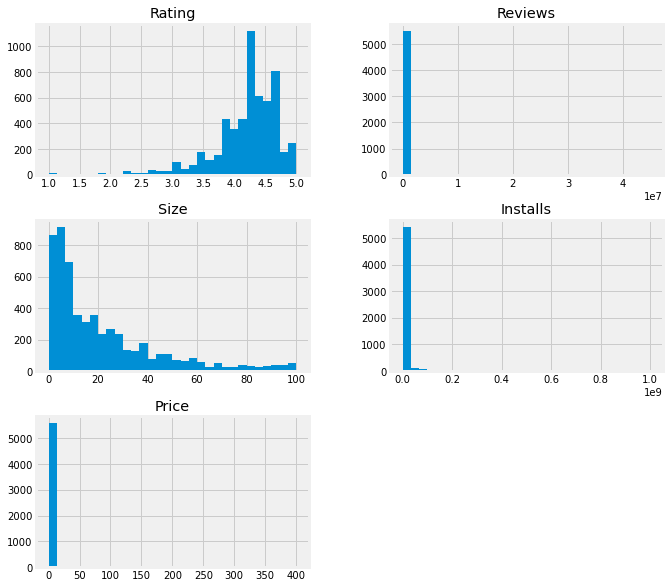

In [9]:
# 연속형 변수 분포 확인
continuous = train[['Rating','Reviews','Size','Installs','Price']]
continuous.hist(bins=30,figsize=(10,10))
plt.show()

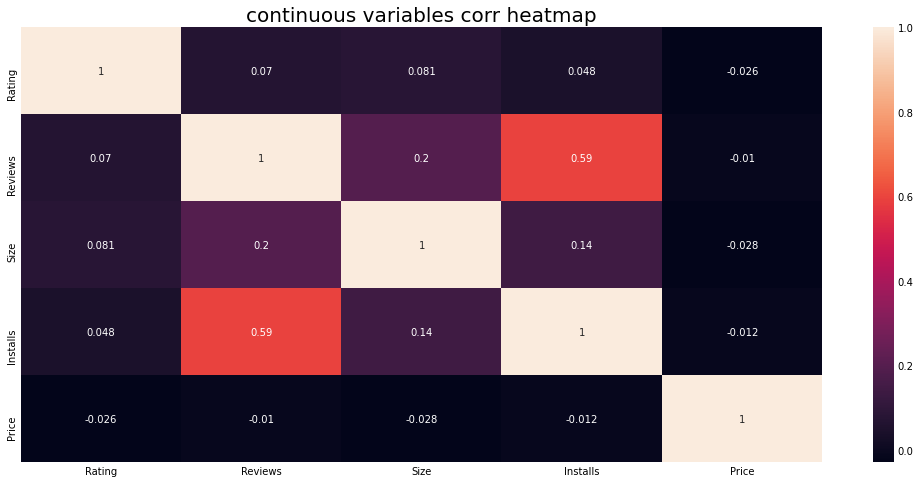

In [10]:
# 연속형 변수 heatmap 상관관계 시각화
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(), annot=True)
plt.title('continuous variables corr heatmap', fontsize=20)

plt.show()

- Rating을 제외한 연속형 변수들은 특정 값이 크게 존재하기 때문에 log변환을 하여 확인해 본다.
- 연속형 변수간의 유의미한 상관관계는 존재하지 않는다 

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Reviews'}>],
       [<AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Installs'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

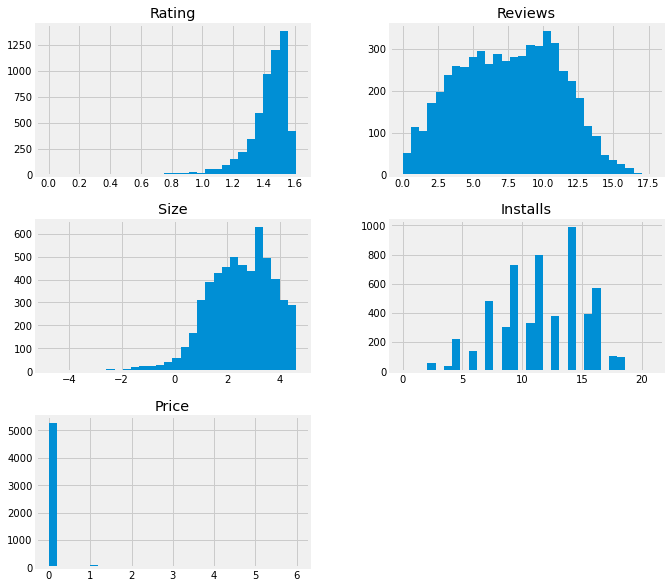

In [11]:
continuous_columns = ['Rating','Reviews','Size','Installs','Price']
a = pd.DataFrame(data = range(len(train)))
for column in continuous_columns :
    t = train[column].apply(lambda x : np.log(x) if x != 0 else x)
    a = pd.concat([a, t], axis =1 )

a[continuous_columns].hist(bins=30,figsize=(10,10))

- `Price` 의 경우 무료 어플이 대다수 이므로 가격이 있는 어플에 대해서 이상치로 판단하기 힘들기 때문에 그대로 진행하지만 `Reviews`나 `Size`, `Installs` 의 경우 log변환을 하였을 때 정규분포 모양을 띄는것을 볼 수 있다.

In [12]:
train['Reviews'] = train['Reviews'].apply(lambda x : np.log(x) if x !=0 else x)
test['Reviews'] = test['Reviews'].apply(lambda x : np.log(x) if x != 0 else x)

train['Size'] = train['Size'].apply(lambda x : np.log(x) if x != 0 else x)
test['Size'] = test['Size'].apply(lambda x : np.log(x) if x != 0 else x)

train['Installs'] = train['Installs'].apply(lambda x : np.log(x) if x != 0 else x)
test['Installs'] = test['Installs'].apply(lambda x: np.log(x) if x != 0 else x)

### 연속형 변수 이상치 확인
Type 은 유무료를 나타내는 범주형

In [13]:
continuous = train[['Rating','Reviews','Size','Installs','Price']]

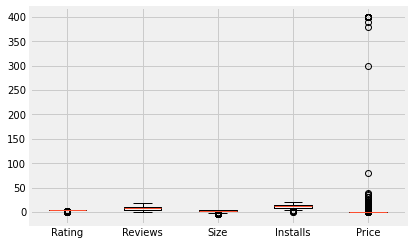

In [14]:
plt.boxplot(continuous)
plt.xticks(range(1,6),['Rating','Reviews','Size','Installs','Price'])
plt.show()

### 데이터 왜도, 첨도 확인

In [15]:
n_columns = ['Rating','Reviews','Size','Installs','Price']

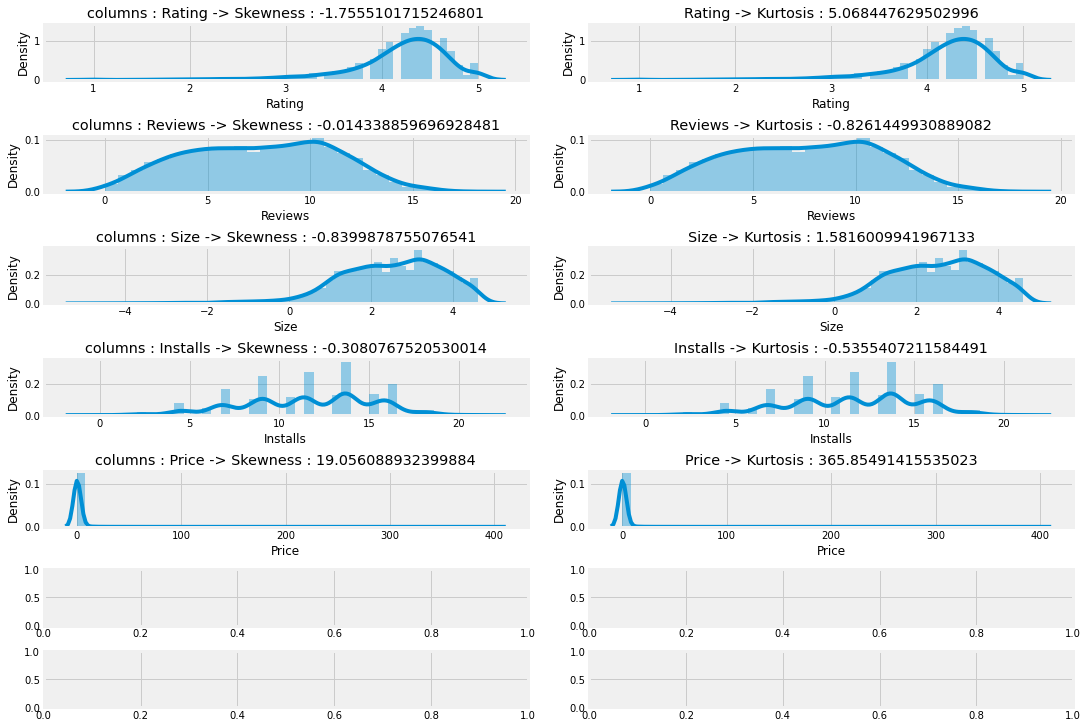

In [16]:
f, axes = plt.subplots(7,2 ,figsize = (15,10), constrained_layout = True)
i = 0
for column in n_columns :
    for j in range(2) :
        sns.distplot(continuous[column], ax = axes[i][j])
        if j == 0 :
            axes[i][j].set_title("columns : {} -> Skewness : {}".format(column, continuous[column].skew()))
        else :
            axes[i][j].set_title("{} -> Kurtosis : {}".format(column, continuous[column].kurt()))
            
    
    i += 1
plt.show()

- boxplot을 확인한 결과 `Price`의 경우 무료 어플이 많기 때문에 이상치가 많을 수 밖에 없다. 따라서 별도로 처리하지 않는다
- 왜도와 첨도를 확인해 보면 `Price`를 제외하고 크게 정상 분포에서 벗어 났다고 보기 어렵다. log변환이 올바른 선택이었다.

###  범주형 변수 확인 

In [17]:
category_count = train['Category'].value_counts()
category_count

FAMILY                 1102
GAME                    657
TOOLS                   463
MEDICAL                 253
PERSONALIZATION         227
LIFESTYLE               220
FINANCE                 201
PHOTOGRAPHY             175
PRODUCTIVITY            173
HEALTH_AND_FITNESS      172
BUSINESS                166
COMMUNICATION           153
SPORTS                  143
SHOPPING                139
SOCIAL                  122
DATING                  121
NEWS_AND_MAGAZINES      114
BOOKS_AND_REFERENCE     109
TRAVEL_AND_LOCAL        108
VIDEO_PLAYERS            90
EDUCATION                88
MAPS_AND_NAVIGATION      76
FOOD_AND_DRINK           69
ENTERTAINMENT            64
LIBRARIES_AND_DEMO       57
ART_AND_DESIGN           57
AUTO_AND_VEHICLES        55
HOUSE_AND_HOME           48
COMICS                   46
PARENTING                43
WEATHER                  37
BEAUTY                   34
EVENTS                   34
Name: Category, dtype: int64

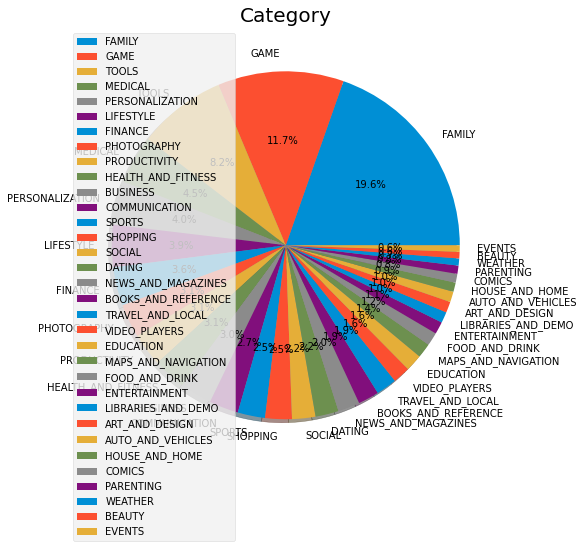

In [18]:
# Category 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(category_count,labels=category_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Category',size = 20)
plt.legend()
plt.show()

In [19]:
con_rating_count = train['Content Rating'].value_counts()
con_rating_count

Everyone           4531
Teen                589
Mature 17+          281
Everyone 10+        212
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

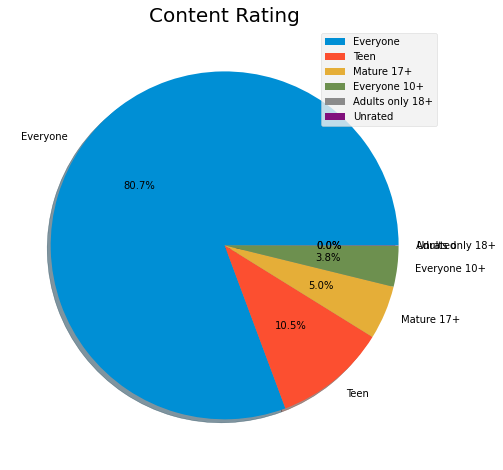

In [20]:
fig = plt.figure(figsize=(16,8)) 
plt.pie(con_rating_count,labels=con_rating_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Content Rating',size = 20)
plt.legend()
plt.show()

In [21]:
genres_count = train['Genres'].value_counts()
genres_count

Tools                                    463
Entertainment                            337
Education                                309
Medical                                  253
Personalization                          227
Lifestyle                                219
Action                                   214
Finance                                  201
Photography                              175
Productivity                             173
Health & Fitness                         172
Business                                 166
Communication                            153
Sports                                   149
Shopping                                 139
Arcade                                   129
Social                                   122
Dating                                   121
News & Magazines                         114
Simulation                               110
Books & Reference                        109
Travel & Local                           107
Video Play

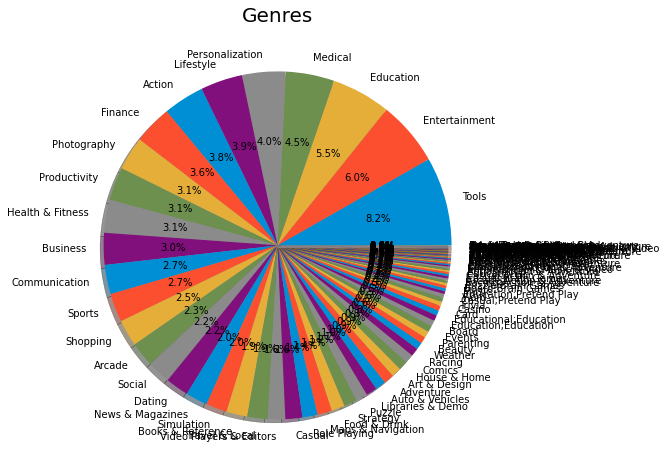

In [22]:
# Genrs 시각화
fig = plt.figure(figsize=(16,8)) 
plt.pie(genres_count,labels=genres_count.index,autopct='%1.1f%%', shadow=True)
plt.title('Genres',size = 20)
plt.show()

In [70]:
train['Category'].nunique(), train['Content Rating'].nunique(), train['Genres'].nunique()

(33, 6, 106)

- 범주형 변수들중 `content Rating` 의 경우 Everyone이 대부분을 차지하기 때문에 one - hot encoding을 이용하여 변환을 진행 해준다. 
- 나며지 `Category`와 `Genres`는 Label Encoding을 진행해준다.

In [67]:
tr_idx = len(train)

df = pd.concat([train, test], axis = 0, ignore_index= True)

In [68]:
df['Category'] = df['Category'].astype('category').cat.codes
df['Genres'] = df['Genres'].astype('category').cat.codes

In [69]:
one_hot = pd.get_dummies(df['Content Rating'])

In [70]:
one_hot

,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
7015,0,1,0,0,0,0
7016,0,1,0,0,0,0
7017,0,1,0,0,0,0
7018,0,1,0,0,0,0


In [71]:
df = pd.concat([df, one_hot], axis = 1)
df.drop(columns = ['Content Rating'], axis = 1 , inplace = True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Id,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,5.068904,2.944439,9.210340,0,0.0,9,2018-01-07,0,0,1,0,0,0,0
1,Coloring book moana,0,3.9,6.874198,2.639057,13.122363,0,0.0,11,2018-01-15,1,0,1,0,0,0,0
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",0,4.7,11.379508,2.163323,15.424948,0,0.0,9,2018-08-01,2,0,1,0,0,0,0
3,Sketch - Draw & Paint,0,4.5,12.281384,3.218876,17.727534,0,0.0,9,2018-06-08,3,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,0,4.3,6.874198,1.029619,11.512925,0,0.0,10,2018-06-20,4,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,Chemin (fr),3,NaN,3.784190,-0.479650,6.907755,0,0.0,18,2014-03-23,7016,0,1,0,0,0,0
7016,FR Calculator,11,NaN,1.945910,0.955511,6.214608,0,0.0,35,2017-06-18,7017,0,1,0,0,0,0
7017,Sya9a Maroc - FR,11,NaN,3.637586,3.970292,8.517193,0,0.0,35,2017-07-25,7018,0,1,0,0,0,0
7018,Fr. Mike Schmitz Audio Teachings,11,NaN,1.386294,1.280934,4.605170,0,0.0,35,2018-07-06,7019,0,1,0,0,0,0


- `Last Updated`의 경우 간단하게 현재 날짜로 부터 얼마나 오래 되었는지를 수치형으로 바꾸어 준다. 2019년 1월1일을 기준으로 해준다. 

In [72]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [73]:
df['Last Updated'].dt.year.unique()

array([2018, 2017, 2014, 2016, 2015, 2013, 2012, 2011, 2010], dtype=int64)

In [89]:
from datetime import datetime
time = datetime(2019,1,1)
df['Last Updated'] = (time -  df['Last Updated']).apply(lambda x : int(str(x).split()[0]))

In [100]:
df.drop(columns = ['App', 'Type','Id'], axis = 1, inplace = True)

train = df.iloc[:tr_idx, :]
test = df.iloc[tr_idx:, :]



- 변환을 다 한 후 필요없는 `App`과 `Id`를 제거해준다. `Type`은 유,무료 유무인데 이는 `Price`변수가 나타내므로 제거하여 train, test 분리한다.

In [102]:
train

,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,0,4.1,5.068904,2.944439,9.210340,0.00,9,359,0,1,0,0,0,0
1,0,3.9,6.874198,2.639057,13.122363,0.00,11,351,0,1,0,0,0,0
2,0,4.7,11.379508,2.163323,15.424948,0.00,9,153,0,1,0,0,0,0
3,0,4.5,12.281384,3.218876,17.727534,0.00,9,207,0,0,0,0,1,0
4,0,4.3,6.874198,1.029619,11.512925,0.00,10,195,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,14,4.1,11.484619,1.902108,13.815511,0.00,14,352,0,1,0,0,0,0
5612,11,4.0,8.415825,3.713572,13.815511,0.00,91,380,0,1,0,0,0,0
5613,14,4.3,4.983607,1.791759,9.210340,0.00,67,307,0,0,0,1,0,0
5614,11,4.5,8.183118,4.094345,11.512925,0.00,24,246,0,1,0,0,0,0


In [103]:
test

,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
5616,25,NaN,7.094235,1.458615,11.512925,0.00,77,205,0,1,0,0,0,0
5617,11,NaN,5.587249,0.405465,9.210340,0.00,48,664,0,1,0,0,0,0
5618,14,NaN,5.209486,4.219508,9.210340,0.00,83,201,0,1,0,0,0,0
5619,15,NaN,4.330733,0.182322,6.907755,4.99,58,1436,0,1,0,0,0,0
5620,11,NaN,6.061457,2.484907,9.210340,3.99,19,309,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,3,NaN,3.784190,-0.479650,6.907755,0.00,18,1745,0,1,0,0,0,0
7016,11,NaN,1.945910,0.955511,6.214608,0.00,35,562,0,1,0,0,0,0
7017,11,NaN,3.637586,3.970292,8.517193,0.00,35,525,0,1,0,0,0,0
7018,11,NaN,1.386294,1.280934,4.605170,0.00,35,179,0,1,0,0,0,0


# 2. Modeling

In [180]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [107]:
y = train.Rating
train.drop(columns = 'Rating', axis = 1 , inplace = True)
test.drop(columns = 'Rating', axis = 1, inplace = True)

In [112]:
# 표준화 진행해주었다. 
scaler = StandardScaler()

train = scaler.fit_transform(train)
test = scaler.transform(test)

In [203]:
# 평가지표 rmse 를 정의해준다.
def rmse(y, y_pred) : 
    return -mean_squared_error(y, y_pred,squared=False) # rmse

In [118]:
# train, valid split

X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size = 0.3, random_state = 5 )

### Model List

In [197]:
rr = Ridge()
lr = Lasso()
dt = DecisionTreeRegressor(random_state = 1)
knn = KNeighborsRegressor()
svm = SVR(kernel='rbf')
rf = RandomForestRegressor(random_state = 1)
gbm = GradientBoostingRegressor(random_state = 1)
xgb = XGBRegressor(random_state = 1)
lgb = LGBMRegressor(random_state = 1)

models =  [rr, lr, dt, knn, svm, rf, gbm, xgb, lgb]

In [204]:
cvRMSE = []
cvSTD = []
models_name = []
test_preds = []

for model in models :
    values = cross_val_score(model,X_train, y_train, cv = 5 , scoring=make_scorer(rmse, greater_is_better=False))
    cvRMSE.append(values.mean())
    cvSTD.append(values.std())
    models_name.append(model.__class__.__name__)
    
    model.fit(X_train, y_train)
    test_preds.append(pd.Series(model.predict(X_valid), name = model.__class__.__name__))
    
cv_result = pd.DataFrame({'CV_mean' : cvRMSE, 'CV_std' : cvSTD}, index = models_name).reset_index()
cv_result.columns = ['model', 'CV_mean','CV_std']  

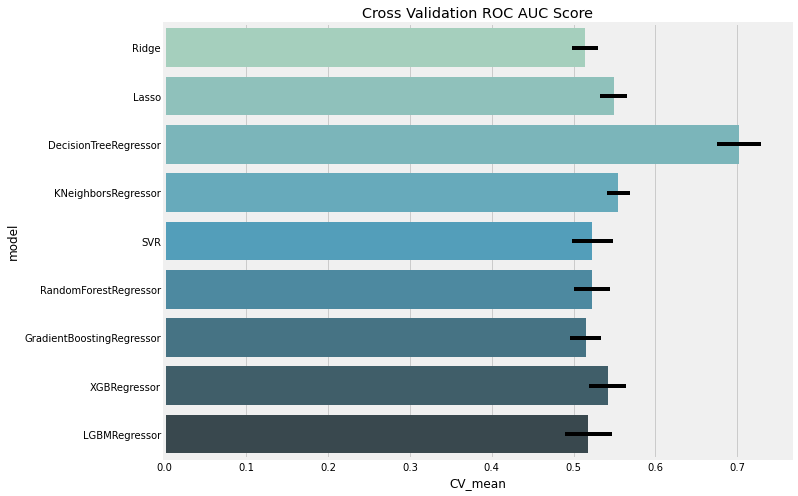

In [205]:
plt.figure(figsize=(10,8))
sns.barplot(y = 'model',x = 'CV_mean', data = cv_result ,palette='GnBu_d', orient= 'h', **{'xerr':cvSTD})
plt.title('Cross Validation ROC AUC Score')
plt.show()

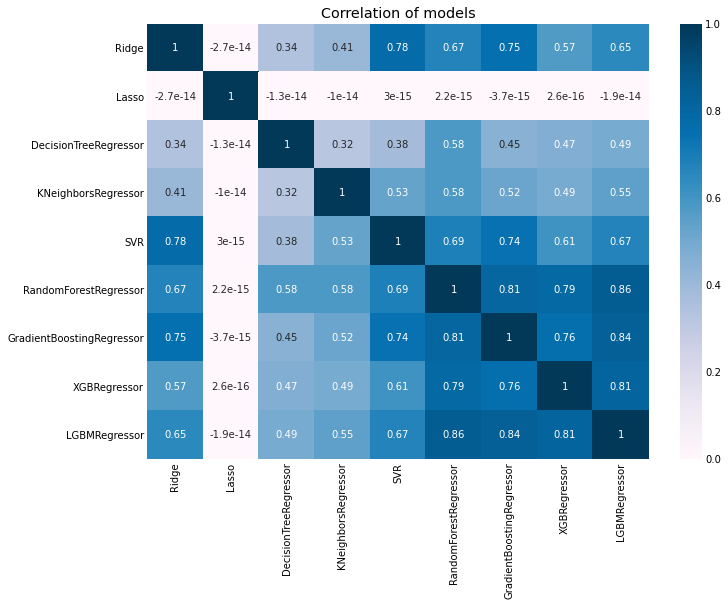

In [179]:
plt.figure(figsize=(10,8))
test_preds = pd.concat(test_preds, axis = 1)
sns.heatmap(test_preds.corr(),annot = True, cmap='PuBu')
plt.title('Correlation of models')
plt.show()

- 성능이 좋고 모델의 예측값 간의 상관관계가 적은 Ridge, SVR, GradientBoostingRegressor, LGBMRegressor 을 사용하여 하이퍼 파라미터를 튜닝한다.

#### Ridge

In [190]:
rr = Ridge(random_state=1)

param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(rr, param_grid = param_grid, cv = 5 , scoring=make_scorer(rmse,greater_is_better= False), n_jobs = -1)
grid.fit(X_train, y_train)

print("Best estimator: {}".format(grid.best_estimator_))
print("Best score: {}".format(grid.best_score_))
print("Valid Score : {}".format(-rmse(y_valid, grid.best_estimator_.predict(X_valid))))

Best estimator: Ridge(alpha=0.0001, random_state=1)
Best score: 0.5136323749209253
Valid Score : 0.4925097673984377


#### SVM

In [208]:
svr = SVR()

param_grid = {'gamma' : ['scale', 'auto'],
             'C' : [0.0001, 0.001, 0.01, 0.1, 1]
             }


grid = GridSearchCV(svr, param_grid = param_grid, cv = 5 , scoring=make_scorer(rmse,greater_is_better= False), n_jobs = -1)
grid.fit(X_train, y_train)

print("Best estimator: {}".format(grid.best_estimator_))
print("Best score: {}".format(grid.best_score_))
print("Valid Score : {}".format(-rmse(y_valid, grid.best_estimator_.predict(X_valid))))

Best estimator: SVR(C=0.0001, gamma='auto')
Best score: 0.5620596393873866
Valid Score : 0.5405535091084706


#### GBM

In [210]:
gbm = GradientBoostingRegressor()

param_grid = {'n_estimators' : [100,200,300], 
              'learning_rate' : [0.001,0.01,0.1],
              'max_depth' : range(3,7,1),
              'min_samples_leaf' : range(3,15, 3)
              
             }


grid = GridSearchCV(gbm, param_grid = param_grid, cv = 5 , scoring=make_scorer(rmse,greater_is_better= False), n_jobs = -1)
grid.fit(X_train, y_train)

print("Best estimator: {}".format(grid.best_estimator_))
print("Best score: {}".format(grid.best_score_))
print("Valid Score : {}".format(-rmse(y_valid, grid.best_estimator_.predict(X_valid))))

Best estimator: GradientBoostingRegressor(learning_rate=0.001, min_samples_leaf=6)
Best score: 0.545340822975378
Valid Score : 0.524471636206764


#### LGBM

In [211]:
lgb = LGBMRegressor()

param_grid = {'max_depth' : range(3,7,1),
              'num_iterations' : [100,200,300], 
              'num_leaves' : range(20,40,5)
              
             }


grid = GridSearchCV(lgb, param_grid = param_grid, cv = 5 , scoring=make_scorer(rmse,greater_is_better= False), n_jobs = -1)
grid.fit(X_train, y_train)

print("Best estimator: {}".format(grid.best_estimator_))
print("Best score: {}".format(grid.best_score_))
print("Valid Score : {}".format(-rmse(y_valid, grid.best_estimator_.predict(X_valid))))

Best estimator: LGBMRegressor(max_depth=6, num_iterations=300, num_leaves=30)
Best score: 0.5297828748317754
Valid Score : 0.5091508352393688


- 단일 모델 Hyper Parameter tuning을 한 결과 Ridge Regressor이 성능이 가장 좋게 나왔고 그 다음으로는 LGBM이 좋게 나왔다.
- 이제 이 단일 결과들을 Ensemble을 하는 방법인 Voting, Stacking을 진행해 보겠다.

#### Voting

In [213]:
from sklearn.ensemble import VotingRegressor

rr = Ridge(alpha=0.0001, random_state=1) # 0.49
svm = SVR(C=0.0001, gamma='auto') # 0.54
gbm = GradientBoostingRegressor(learning_rate=0.001, min_samples_leaf=6) # 0.52
lgb =  LGBMRegressor(max_depth=6, num_iterations=300, num_leaves=30)  # 0.50
# 앞에서 hyper parameters tuning한 모델들의 estimator를 지정하여 새롭게 모델을 정의해 준다.

en_reg = VotingRegressor(
    estimators= [('rr',rr), ('svm',svm),('gbm',gbm),('lgb',lgb)],
    weights=[0.5,0.1,0.2,0.4]
    # 각 tuning 모델들의 성능이 차이나기 때문에 동일한 가중치를 적용하면 
    #더욱 성능이 안 좋아질 수 있기 때문에 기존에 좋은 성능을 지닌 모델의 가중치를 더 주어 학습을 진행한다
) 

en_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('rr', Ridge(alpha=0.0001, random_state=1)),
                            ('svm', SVR(C=0.0001, gamma='auto')),
                            ('gbm',
                             GradientBoostingRegressor(learning_rate=0.001,
                                                       min_samples_leaf=6)),
                            ('lgb',
                             LGBMRegressor(max_depth=6, num_iterations=300,
                                           num_leaves=30))],
                weights=[0.5, 0.1, 0.2, 0.4])

In [215]:
en_reg_results = cross_val_score(en_reg, X_train, y_train, cv = 5, scoring=make_scorer(rmse, greater_is_better= False))

print('Ensemble rmse : {}, std : {}'.format(en_reg_results.mean(), en_reg_results.std()))

Ensemble rmse : 0.5086034847029804, std : 0.018707685712450926


In [216]:
print("Valid Score : {}".format(-rmse(y_valid, en_reg.predict(X_valid))))

Valid Score : 0.4870354438283265


- Valid set을 이용하여 결과를 확인해 보면 Ridge Regressor 경우 보다 rmse가 줄어든 것을 확인할 수 있다. 
- Voting의 경우 weight를 조절하는것이 중요하기 때문에 다양한 조합을 통해 Ensemble을 진행 할 수 있다.

In [217]:
voting_result = en_reg.predict(test)

In [248]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['Rating'] = voting_result
sub.to_csv('voting_results.csv', index = False)

#### Stacking

- stacking 또한 기존에 성능이 좋았던 모델들을 기반으로 진행한다 
- (Ridge Regressor, SVM, GBM, LGBM)

In [223]:
def get_stacking_data(model, X_train, y_train, X_test, n_folds=10):
    kfold = KFold(n_splits = n_folds, random_state = 1004)
    train_fold_predict = np.zeros((X_train.shape[0],1))
  # test 는 X_test 값을 이용해서 매 폴드마다 예측을 하기 때문에 (100, fold갯수) 모양이다.
  # 해당 폴드마다 X_test의 예측 값을 fold 에 넣는다! meta model 이 쓸꺼임
    test_predict = np.zeros((X_test.shape[0], n_folds))
    print('model : ',model.__class__.__name__)
  
    for cnt, (train_index, valid_index) in enumerate(kfold.split(X_train)):
        X_train_ = X_train[train_index]
        y_train_ = y_train[train_index]
        X_valid_ = X_train[valid_index]

    # 학습
        model.fit(X_train_,y_train_)
        # 해당 폴드에서 학습된 모델에다가 검증 데이터 (X_valid)로 예측 후 저장
        train_fold_predict[valid_index,:] = model.predict(X_valid_).reshape(-1,1)
        # 해당 폴드에서 생성된 모델에게 원본 테스트 데이터 (X_test)를 이용해서 예측하고 저장
        test_predict[:,cnt] = model.predict(X_test)
  
  # for 문이 끝나면 test_pred는 평균을 내서 하나로 합친다.
    test_predict_mean = np.mean(test_predict, axis=1).reshape(-1,1)
  
    return train_fold_predict, test_predict_mean

In [230]:
rr_train, rr_test = get_stacking_data(rr, X_train, y_train.values, X_valid, n_folds=5)
svm_train, svm_test = get_stacking_data(svm, X_train, y_train.values, X_valid, n_folds=5)
gbm_train, gbm_test = get_stacking_data(gbm, X_train, y_train.values, X_valid, n_folds=5)
lgbm_train, lgbm_test = get_stacking_data(lgb, X_train, y_train.values, X_valid, n_folds=5)

model :  Ridge
model :  SVR
model :  GradientBoostingRegressor
model :  LGBMRegressor


In [231]:
new_X_train = np.concatenate((rr_train,svm_train,gbm_train, lgbm_train), axis=1)
new_X_test = np.concatenate((rr_test,svm_test, gbm_test, lgbm_test), axis=1)

print('원본 : ', X_train.shape, X_valid.shape)
print('새로운 : ', new_X_train.shape, new_X_test.shape)

원본 :  (3931, 13) (1685, 13)
새로운 :  (3931, 4) (1685, 4)


In [236]:
rr = Ridge()
svm = SVR(kernel='rbf')
gbm = GradientBoostingRegressor(random_state = 1)
lgb = LGBMRegressor(random_state = 1)

meta_models = [rr, svm, gbm, lgb]
meta_pred = []
meta_rmse = []

for model in meta_models:
    pred = model.fit(new_X_train, y_train).predict(new_X_test)
    score = - rmse(y_valid, pred)
    meta_pred.append(pred)
    meta_rmse.append([f'{model.__class__.__name__} : {score}'])
    
print(meta_rmse)

[['Ridge : 0.48242791624544334'], ['SVR : 0.4878796114104069'], ['GradientBoostingRegressor : 0.48731750142035435'], ['LGBMRegressor : 0.502280292180514']]


- Stacking을 진행한 결과 LGBM을 meta model로 이용했을 경우를 제외하고 모두 성능이 뛰어남을 확인할 수 있다. 따라서 실제 test값을 적용시켜 submission을 생성한다.

In [237]:
rr_train, rr_test = get_stacking_data(rr, X_train, y_train.values, test, n_folds=5)
svm_train, svm_test = get_stacking_data(svm, X_train, y_train.values, test, n_folds=5)
gbm_train, gbm_test = get_stacking_data(gbm, X_train, y_train.values, test, n_folds=5)
lgbm_train, lgbm_test = get_stacking_data(lgb, X_train, y_train.values, test, n_folds=5)

model :  Ridge
model :  SVR
model :  GradientBoostingRegressor
model :  LGBMRegressor


In [238]:
new_X_train = np.concatenate((rr_train,svm_train,gbm_train, lgbm_train), axis=1)
new_X_test = np.concatenate((rr_test,svm_test, gbm_test, lgbm_test), axis=1)

print('원본 : ', X_train.shape, test.shape)
print('새로운 : ', new_X_train.shape, new_X_test.shape)

원본 :  (3931, 13) (1404, 13)
새로운 :  (3931, 4) (1404, 4)


In [240]:
rr = Ridge()
svm = SVR(kernel='rbf')
gbm = GradientBoostingRegressor(random_state = 1)
lgb = LGBMRegressor(random_state = 1)

meta_models = [rr, svm, gbm, lgb]
meta_pred = []

for model in meta_models:
    pred = model.fit(new_X_train, y_train).predict(new_X_test)
    meta_pred.append(pred)


In [242]:
stacking_result_rr = meta_pred[0]
stacking_result_svm = meta_pred[1]
stacking_result_gbm = meta_pred[2]
stacking_result_lgb = meta_pred[3]


In [250]:
stacking_results = [stacking_result_rr, stacking_result_svm, stacking_result_gbm, stacking_result_lgb]

for i, result in enumerate(stacking_results) :
    sub = pd.DataFrame()
    sub['Id'] = test_id
    sub['Rating'] = result
    sub.to_csv(f'stacking_results_{i}.csv', index = False)

In [252]:
rr_gbm_results = np.average([stacking_result_rr,stacking_result_gbm], weights=(5.5,4.5), axis = 0)

In [253]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['Rating'] = rr_gbm_results
sub.to_csv('rr_gbm_results.csv', index = False)

- Voting result : 0.58907
- Stacking results 
  - meta model : Ridge = 0.58119
  - meta model : svm = 0.59528
  - meta model : gbm = 0.58484
  - meta model : lgb = 0.60880
  
- Stacking results Ensemble
  - Ridge , GBM = 0.58057